In [1]:
from Module import *
from TrainAlgorithms import *
from keras.datasets import mnist

In [2]:
def sum(x):
    return x.sum(0)

In [3]:
path="../../../../Data/malware-classification/"
with open(path+'data11.npy', 'rb') as f:
    transxtrain=np.load(f)
    transx_test=np.load(f)
    transytrain=np.load(f)
    transy_test=np.load(f)
xtr=torch.from_numpy(transxtrain).float()
xte=torch.from_numpy(transx_test).float()
ytr=torch.from_numpy(transytrain).long()
yte=torch.from_numpy(transy_test).long()

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=torch.from_numpy(x_train).float().reshape(60000,784)
x_test=torch.from_numpy(x_test).float().reshape(10000,784)
y_train=torch.from_numpy(y_train).float()
y_test=torch.from_numpy(y_test).float()

In [5]:
x_train[:10].shape

torch.Size([10, 784])

In [6]:
model=HDCModel(10,784,4000, classh=x_train[:10])
block=TrainBlock([FebHDVersion2(64,.0001),AddNoise(1)])
train_start(model,FebHDRepeater(block,maxreps=30),x_train,y_train)

/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/GeneralHDC/Module.py:62: UserWarning: An output with one or more elements was resized since it had shape [784, 4000], which does not match the required output shape [416, 4000].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


tensor(0.1030)
tensor(-0.6519)
tensor(0.7819)
tensor(1.3689)
tensor(0.8766)
tensor(1.7079)
tensor(0.9198)
tensor(-0.2165)
tensor(0.9431)
tensor(1.1027)
tensor(0.9577)
tensor(0.2353)
tensor(0.9675)
tensor(1.3791)
tensor(0.9742)
tensor(1.5578)
tensor(0.9793)
tensor(2.4215)
tensor(0.9825)
tensor(3.2688)
tensor(0.9854)
tensor(3.6988)
tensor(0.9875)
tensor(2.8829)
tensor(0.9902)
tensor(2.5129)
tensor(0.9911)
tensor(3.1409)
tensor(0.9922)
tensor(4.5979)
tensor(0.9929)
tensor(5.1047)
tensor(0.9939)
tensor(6.7106)
tensor(0.9941)
tensor(6.1052)
tensor(0.9954)
tensor(7.7336)
tensor(0.9956)
tensor(9.0704)
tensor(0.9962)
tensor(9.2809)
tensor(0.9964)
tensor(9.5926)
tensor(0.9965)
tensor(11.0248)
tensor(0.9970)
tensor(10.6004)
tensor(0.9975)
tensor(10.3356)
tensor(0.9977)
tensor(10.6160)
tensor(0.9980)
tensor(9.8642)
tensor(0.9985)
tensor(8.7941)
tensor(0.9986)
tensor(9.5716)
tensor(0.9988)
tensor(9.5522)


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/GeneralHDC/Module.py:62: UserWarning: An output with one or more elements was resized since it had shape [784, 4000], which does not match the required output shape [200, 4000].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


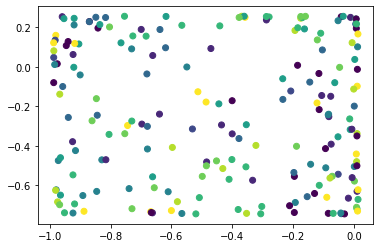

In [7]:
normed_classes=torch.nn.functional.normalize(model.classes)
var = torch.var(normed_classes, 0) 
# assert len(var) == self.dimensionality
# rank each entry in variances from smallest to largest
order = torch.argsort(var)
x=model.encode(x_train[:200])[:,order[-1]]
y=model.encode(x_train[:200])[:,order[-2]]
plt.scatter(x,y,c=model(x_train[:200]))

In [8]:
labels=model(x_train)

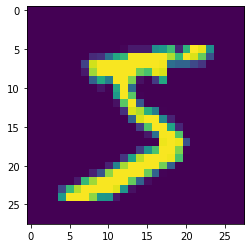

In [13]:
x_train[labels==0].shape
plt.imshow(x_train[labels==0][0].reshape(28,28))


In [28]:
x_train.mean(0).unsqueeze(0).shape

torch.Size([1, 784])

In [38]:
cos_cdist(model.encode(x_train[19:20]),model.classes)/cos_cdist(model.encode(x_train),model.classes).mean(0).unsqueeze(0)

tensor([[0.9645, 1.0320, 0.9918, 1.0242, 0.9849, 1.0150, 1.0066, 0.9608, 1.0338,
         1.0102]])

In [22]:
model(x_train[:20])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [68]:
diffs=[]
for i in range(0,10):
    # trainblock=TrainBlock()
    # trainblock.append_component(ClassicVersion2(64,.0001))
    # trainblock.append_component(Normalize())
    # trainblock=TrainBlock(
    #     [Normalize(),TrainRepeater(ClassicVersion2(64,.0001),15)]
    # )
    # neuralHD=TrainRepeater(trainblock,5)
    # encodedprinter=DebugPrinter("train",sum)
    model=HDCModel(9,257,2048)
    train_start(model,OnlineHDv2(45,4,.0001),xtr,ytr)
    start=eval_acc(model,xte,yte)
    train_start(model,OnlineHDv2(6,1,.0001),xtr,ytr) 
    train_start(model,Normalize(),xtr,ytr)
    train_start(model,OnlineHDv2(1,1,.0001),xtr,ytr) 
    stop=eval_acc(model,xte,yte)
    diff=start-stop
    diffs.append(diff)
    print(stop)


tensor(0.9584)
tensor(0.9643)
tensor(0.9621)
tensor(0.9603)
tensor(0.9610)
tensor(0.9621)
tensor(0.9647)
tensor(0.9610)
tensor(0.9603)
tensor(0.9621)


In [63]:
np.median(diffs)

-0.01748252

In [61]:
np.median(diffs)

-0.019506812

In [59]:
np.median(diffs)

-0.008833259

In [57]:
np.median(diffs)

-0.014906168

In [ ]:
model=HDCModel(9,257,1000)

In [48]:
# model=HDCModel(9,257,1000)
train_start(model,OnlineHDv2(10,64,.0001),xtr,ytr)
train_start(model,Normalize(),xtr,ytr)

In [46]:
model.basis[:]=model.basis+torch.normal(0,1,(1000,257))

In [49]:
print(eval_acc(model,xte,yte))

tensor(0.8693)


In [7]:

for i in range(0,10):
    # trainblock=TrainBlock()
    # trainblock.append_component(ClassicVersion2(64,.0001))
    # trainblock.append_component(Normalize())
    trainblock=TrainBlock(
        [Normalize(),TrainRepeater(ClassicVersion2(64,.0001),15)]
    )
    neuralHD=TrainRepeater(trainblock,5)
    encodedprinter=DebugPrinter("train",sum)
    model=HDCModel(9,257,1000, kernel=None)

    train_start(model,neuralHD,xtr,ytr)

    print(eval_acc(model,xte,yte))

/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/GeneralHDC/Module.py:59: UserWarning: An output with one or more elements was resized since it had shape [257, 1000], which does not match the required output shape [184, 1000].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)
/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/GeneralHDC/Module.py:59: UserWarning: An output with one or more elements was resized since it had shape [257, 1000], which does not match the required output shape [147, 1000].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, 

tensor(0.9477)
tensor(0.9529)
tensor(0.9481)
tensor(0.9547)
tensor(0.9518)
tensor(0.9481)
tensor(0.9514)
tensor(0.9452)
tensor(0.9474)
tensor(0.9466)


In [10]:
xtr.size(1)

257

In [ ]:
kwargs=kwargs
trainblock.apply(model,)

In [6]:
def test_args_kwargs(arg1, arg2):
    print("arg1:", arg1)
    print("arg2:", arg2)
    print("arg3:", arg3)

In [10]:
model.basis.shape

torch.Size([1000, 257])

In [34]:
array=torch.zeros(3,5)

In [35]:
def changearray(array):
    array[:]=torch.ones(3,5)

In [36]:
changearray(array)

In [37]:
array

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])